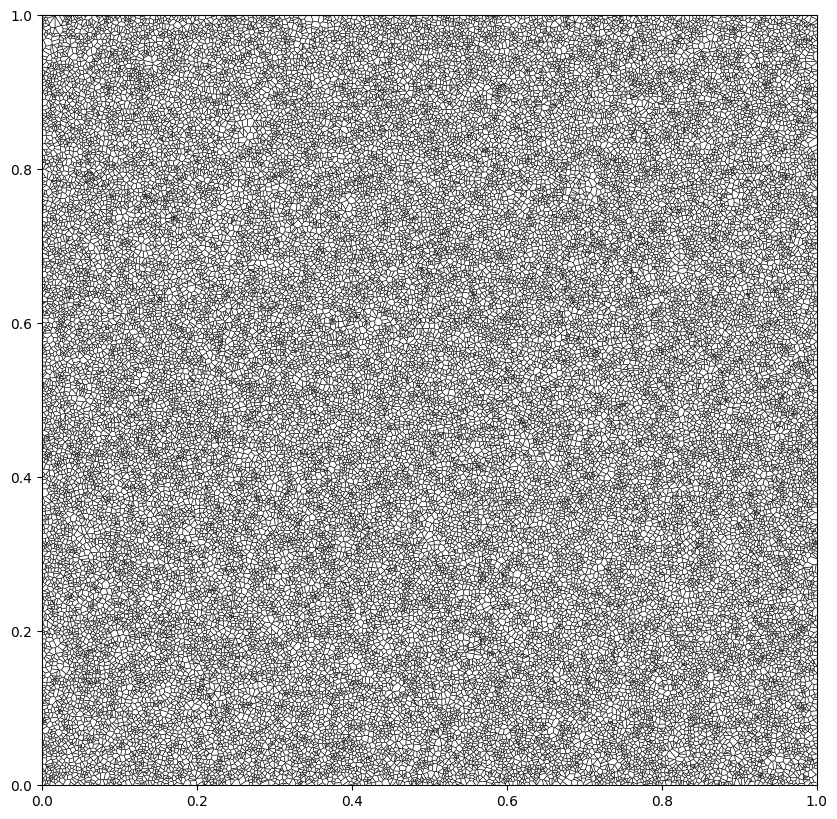

In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import pyplot as plt


#Let us generate a few random coordinates
coords = np.random.rand(50000, 2) 
vor2 = Voronoi(coords)

fig, ax = plt.subplots(figsize = [10,10])

fig = voronoi_plot_2d(vor2, ax=ax, point_size = 0, show_vertices = False, line_width = 0.5)




ax.set_xlim([0,1])
ax.set_ylim([0,1])
#plt.savefig('voronoi.png', dpi = 700, bbox_inches = 'tight')